In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.svm import SVC

In [113]:
df = pd.read_csv('Qualitative_Bankruptcy.data.csv')
df.head()

,"P,P,A,A,A,P,NB"
0,"N,N,A,A,A,N,NB"
1,"A,A,A,A,A,A,NB"
2,"P,P,P,P,P,P,NB"
3,"N,N,P,P,P,N,NB"
4,"A,A,P,P,P,A,NB"


Since the data is not formatted properly, we need to create a temporary column name to process the data.

In [114]:
df.columns = ['Temp']
df.head()

,Temp
0,"N,N,A,A,A,N,NB"
1,"A,A,A,A,A,A,NB"
2,"P,P,P,P,P,P,NB"
3,"N,N,P,P,P,N,NB"
4,"A,A,P,P,P,A,NB"


Now that the data is already indexed and we have a column, we need to seperate these strings to different columns as described in the dataset description (https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Qualitative%20Bankruptcy)

In [115]:
cols = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

In [116]:
split = df["Temp"].str.split(",", n = 6, expand = True)


df['Industrial Risk']= split[0]
df['Management Risk']= split[1]
df['Financial Flexibility']= split[2]
df['Credibility']= split[3]
df['Competitiveness']= split[4]
df['Operating Risk']= split[5]
df['Class']= split[6]

df.drop(columns =["Temp"], inplace = True)
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        249 non-null    object
 1   Management Risk        249 non-null    object
 2   Financial Flexibility  249 non-null    object
 3   Credibility            249 non-null    object
 4   Competitiveness        249 non-null    object
 5   Operating Risk         249 non-null    object
 6   Class                  249 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


Turns out, there are no null values on the dataset.
Every variable is an object datatype, so we need to encode them later.

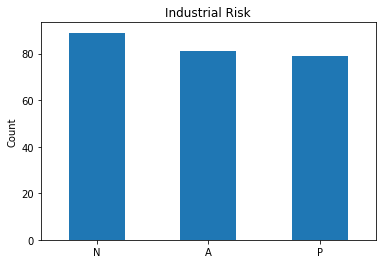

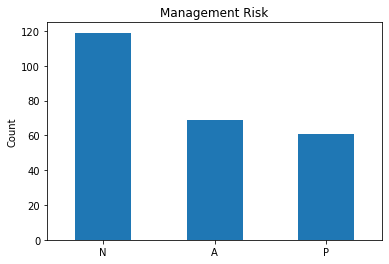

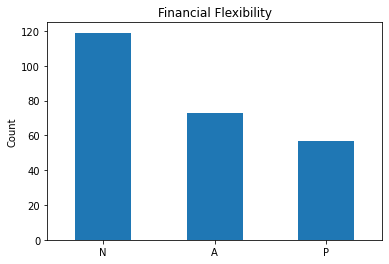

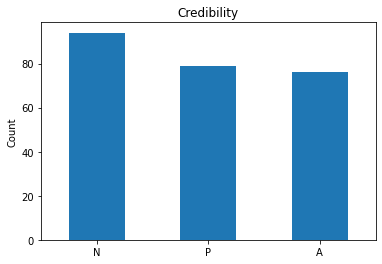

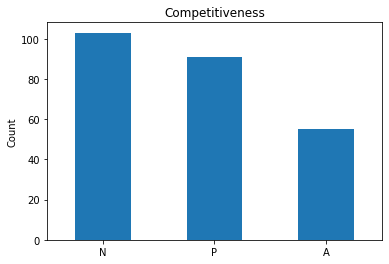

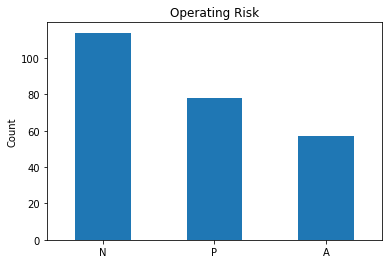

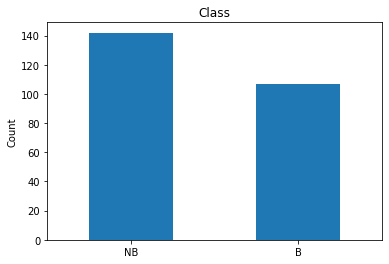

In [118]:
for i in cols:
  df[i].value_counts().plot(kind='bar',title = str(i))
  plt.ylabel("Count")
  plt.xticks(rotation=0)
  plt.show()

# Feature Engineering


We are not going to encode the class variable since we will use it as our target variable for classification

In [119]:
le = LabelEncoder()
new_cols = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk']
for i in new_cols:
  df[i] = le.fit_transform(df[i])

df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,NB
1,0,0,0,0,0,0,NB
2,2,2,2,2,2,2,NB
3,1,1,2,2,2,1,NB
4,0,0,2,2,2,0,NB


Since the data is not dispersed, we dont need to scale it.

In [125]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [126]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(186, 6)
(63, 6)
(186,)
(63,)


In [137]:
dtc = DecisionTreeClassifier()

model1 = dtc.fit(X_train,y_train)

pred = dtc.predict(X_test)

In [128]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        27
          NB       1.00      1.00      1.00        36

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



[Text(0.7142857142857143, 0.9, 'Competitiveness <= 1.5\ngini = 0.49\nsamples = 186\nvalue = [80, 106]\nclass = Bankrupt'),
 Text(0.5714285714285714, 0.7, 'Competitiveness <= 0.5\ngini = 0.437\nsamples = 118\nvalue = [80, 38]\nclass = Not Bankrupt'),
 Text(0.42857142857142855, 0.5, 'Operating Risk <= 0.5\ngini = 0.136\nsamples = 41\nvalue = [3, 38]\nclass = Bankrupt'),
 Text(0.2857142857142857, 0.3, 'Industrial Risk <= 1.0\ngini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Bankrupt'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Bankrupt'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Not Bankrupt'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = Bankrupt'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]\nclass = Not Bankrupt'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 68\nvalue = [0, 68]\nclass = Bankrupt')]

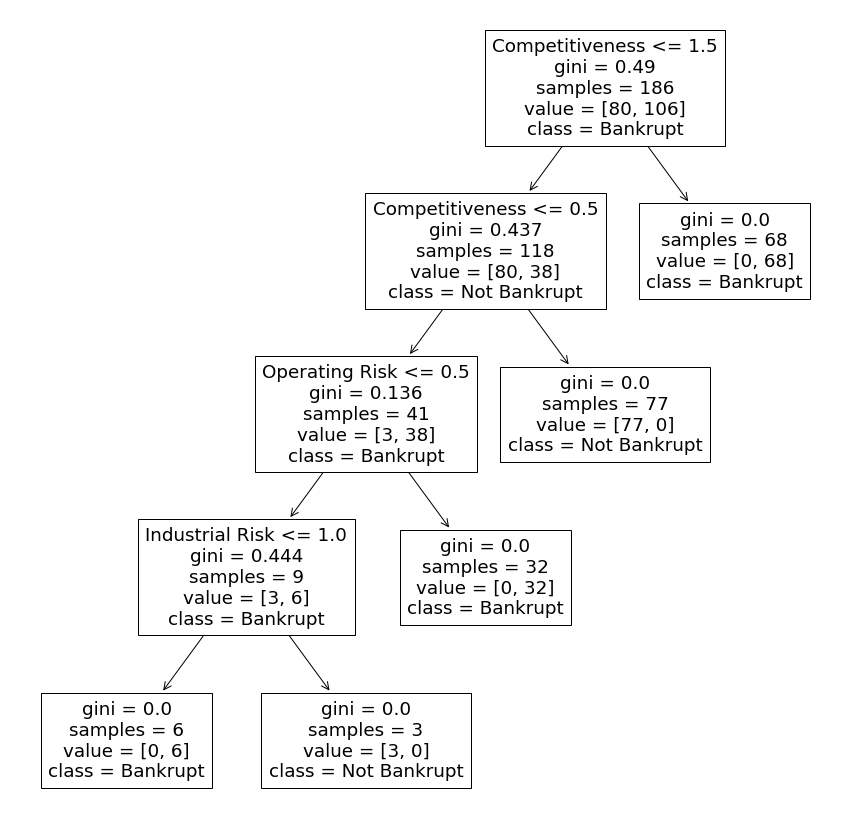

In [144]:
plt.figure(figsize=(15,15))
plot_tree(model1, feature_names = df.drop(['Class'],axis=1).columns,class_names =['Not Bankrupt','Bankrupt'])

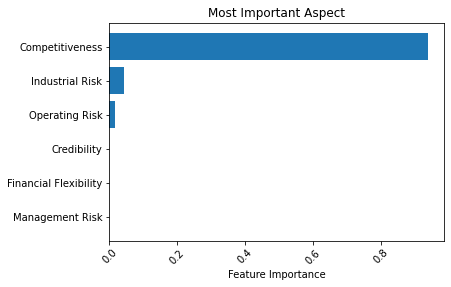

In [154]:
fi = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.feature_importances_})
sorted = fi.sort_values("Importance")
plt.barh(sorted['Attribute'],sorted['Importance'])
plt.title('Most Important Aspect')
plt.xticks(rotation=45)
plt.xlabel("Feature Importance")
plt.show()

In [142]:
svm = SVC()
model2 = svm.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [143]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00        27
          NB       1.00      1.00      1.00        36

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



Text(0.5, 0, 'Feature Importance')

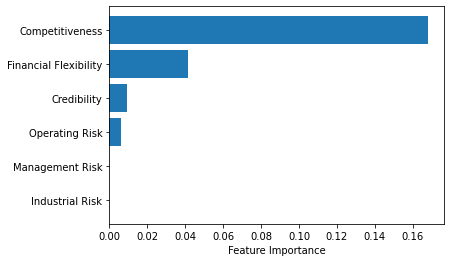

In [147]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm, X_test, y_test)
features = np.array(new_cols)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")